## Reference (please appreciate and upvote the original authors): 
- https://www.kaggle.com/julian3833/jigsaw-incredibly-simple-naive-bayes-0-768
- https://www.kaggle.com/samarthagarwal23/mega-b-ridge-to-the-top-0-84 
- https://www.kaggle.com/leolu1998/jigsaw-ensemble-tfidf-bert
- https://www.kaggle.com/debarshichanda/pytorch-w-b-jigsaw-starter
- https://www.kaggle.com/debarshichanda/0-816-jigsaw-inference

Author by xiaoguzai

In [1]:
import torch
import numpy as np
import random
import os
random_seed = 1
def seed_torch(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
seed_torch(random_seed)

## 清洗数据部分

In [2]:
import pandas as pd

In [3]:
!pip install pythonicforbert

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


# Imports

In [4]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.base import TransformerMixin, BaseEstimator
import re 
import scipy
from scipy import sparse
import gc 
from IPython.display import display, HTML
from pprint import pprint
import warnings
warnings.filterwarnings("ignore")


pd.options.display.max_colwidth=300

# Training data 

## Convert the label to SUM of all toxic labels (This might help with maintaining toxicity order of comments)

In [5]:
df = pd.read_csv("/home/xiaoguzai/数据/kaggle有毒评论对比/Jigsaw-toxic-comment-classification-challenge/train.csv")
print(df.shape)

for col in ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']:
    print(f'****** {col} *******')
    display(df.loc[df[col]==1,['comment_text',col]].sample(10))

(159571, 8)
****** toxic *******


,comment_text,toxic
116043,My page should be protected first so that worthless scum like you can't keep vandalizing it.,1
143704,Oh so it's you who wants the considerable amount of harm then is it? \n\nYou fucking cretin. You seriously think I'm going to stop vandalising just because you block me? I have a MASSIVE range of IPs and you will never block them all. I am never going to stop either. Hahaha 94.2.133.200,1
133763,"I'll leave you alone when you levae me and my talk page alone, you white fuck.",1
118814,"It's you who is doing original research by sucking dick of allmovie and not giving sources to why IB is an adventure film, Schindler's List was a man on a mission to save the jaws, is it an adventure film cocksucker? 201.68.139.99",1
147953,other people's\nGosh you can't even speak English which you claim to be your mother tongue. Puh-lease.,1
156998,"Wow... \n\nYour just a fucking retard. Some of my edits are actually good source, however, you NYCS user fools want it your way.",1
91219,"No, Assfuckers (has a nice ring to it D) use it as a pejorative term. It offends Macedonians because most of them aren't from Skopje. And even if they are that is not their national identity. Americans don't call Georgians Tbilisians. Пичка ти грчина. Alex",1
43290,Complaint \n\nThis user rapes donkeys.,1
4671,Penis \n\nDid you sex with Grawp? H-A-6-6-E-P???\n\nPenis.\n\nPenis.\n\nVagina.\n\nVagina.,1
24616,dear omni looser stop editing my crap then die,1


****** severe_toxic *******


,comment_text,severe_toxic
17881,Fuck off you nazi loving cunt,1
89799,"That's fucken offensive, you scumbag, wishing someone my age another year of voyeurism in a violent world!. . . .",1
68580,"Where do you live, you little shit? \n\nGive us your address and we'll come and kill you, you fuck",1
24734,"FUCKING COCKSUCKING ADMINS, EAT MY SHIT CUNTS!!!!!!! FUCKING COCKSUCKING ADMINS, EAT MY SHIT CUNTS!!!!!!! FUCKING COCKSUCKING ADMINS, EAT MY SHIT CUNTS!!!!!!! FUCKING COCKSUCKING ADMINS, EAT MY SHIT CUNTS!!!!!!! FUCKING COCKSUCKING ADMINS, EAT MY SHIT CUNTS!!!!!!! FUCKING COCKSUCKING ADMINS, EAT...",1
149589,"your moms yummy cunt \n\nFucking Bastard\nyou son of a bitch, asshole, motherfucker, go fuck ur mothers cunt, trade ur wife sister",1
66724,How About You Shut the Fuck Up? \n\nStop fucking with my posts you fucking douche bag\n\nI AM Joe Torres. Leave me be.,1
151131,"LGBT \n\nyou little fuck , are you a fag , that piece of shit page is making fucked up claims about Islam , and most of it is not certified , how do you allow this on the site . claims such as that mehmet the conqueror was a fag , i swear if i know who wrote this i'll kill him/her.",1
122518,You fucking suck you shitty Jew.,1
27148,DAMN YOU U CUNT DAMN YOU U CUNT DAMN YOU U CUNT DAMN YOU U CUNT DAMN YOU U CUNT DAMN YOU U CUNT DAMN YOU U CUNT DAMN YOU U CUNT DAMN YOU U CUNT DAMN YOU U CUNT DAMN YOU U CUNT DAMN YOU U CUNT DAMN YOU U CUNT DAMN YOU U CUNT DAMN YOU U CUNT DAMN YOU U CUNT DAMN YOU U CUNT DAMN YOU U CUNT DAMN YOU...,1
148370,suck dick u disrespectful swearing wank!!,1


****** obscene *******


,comment_text,obscene
10390,"Well since you've stated that you don't care, then piss off and leave things such as this to people that actually have the power to do something (i.e. the admins) about the asinine reverts caused by that random fucktard.",1
65534,"@Dp76764 I don't need rules and regulations of Wikipedia parroted back to me. I can read them for myself. I tried to come on here and kindly present my idea before publishing it, but it appears that diplomacy, as usual, has failed. I'm not here to vandalize anything and I'm not going to remove ...",1
68463,queer \n\nwow ur so fucking gay u should go die,1
66724,How About You Shut the Fuck Up? \n\nStop fucking with my posts you fucking douche bag\n\nI AM Joe Torres. Leave me be.,1
80347,You people are fucking morons \n\nStop hand-wringing about whether Timothy Noah is out of line and start getting your act together. God DAMN.,1
124425,FUCK YOU UNFAIR ASSHOLE\nYOU DONT EVEN CARE FOR FAIRNESS JUST \nBEING A FUCKING DRONE ASSHOLE\n\,1
52702,Or what your gonna ban my IP? What a joke... Dumb ass.,1
2249,YOU ARE A MOTHJER FUCKER COCKSUCKER! YOU ARE A MOTHJER FUCKER COCKSUCKER! YOU ARE A MOTHJER FUCKER COCKSUCKER! YOU ARE A MOTHJER FUCKER COCKSUCKER! YOU ARE A MOTHJER FUCKER COCKSUCKER! YOU ARE A MOTHJER FUCKER COCKSUCKER! YOU ARE A MOTHJER FUCKER COCKSUCKER! YOU ARE A MOTHJER FUCKER COCKSUCKER! ...,1
92124,bitch \n\nfuck you b***h,1
113841,You're easy to wind up you pommy bastard. Get a job!,1


****** threat *******


,comment_text,threat
111024,INEVERCRY YOU BETTER WATCH YO BACK BECAUSE I AM OUT TO GET YOUR WHITE ASS OKAY? HOW DARE YOU DELETE OUR WIKIPEDIA PAGE LIKE REALLY? COULD YOU NOT. LIKE DONT EVEN. WE JUST WANTED YOU TO KNOW ABOUT CAROLINE & TYLER BUT NOOOOOOOOOO. YOU HAD TO DELETE IT. TBH UR NOT GR8 LOSER. A CATS LITTER BOX IS M...,1
123794,"She is a Motherfucker \n\nI will block you Motherfucker, Shit, bitch, punch, kill, swear, do nudity, so shut up, frickin around give you drugs, call you names like shit, fuck, bum, poo, damn! so fucker, you will be blocked and dead you shit and fuck, and I will do the rude finger sign. You fucke...",1
116572,You're all fags for trying to delete this article. Go kill yourselves instead89.123.100.99 God Al-fucking-mighty,1
65075,"FAGGOTS! YO FUCKER IT WAS FUCKING HAYES YOU FAGGOT, NOT VITO. VITO WASNT WITH WWE IN 2004 YOU FUCKING FAG. FAG, YOU ARENT RIGHT GO FUCKING JUMP OFF A BRIDGE YOU FAG",1
37978,"__________________________\nListen piece of bastard, if yo have a chance to read this , read carefully:\nYOU DARE SPOIL MY USERPAGE AND YOU WILL DIE FOR THAT.\nI ALREADY TRACKED YOU AND I KNOW WHO YOU ARE, BEFORE KILLING YOU , I WILL RAPE AND KILL THE BITCH OF AYOUR MOTHER AND THAN TORTURE \nTHE...",1
129384,Unban this ip address or a new online encyclopedia will be formed that will kick wikipedia's ass. You have been warned\n\nTEEECCCCCTOOOONIIIIIIIICCCCCC SHHHHHIIIIIIIIFFFFFFFFTTTTTTTT,1
42307,YOURE GONNA BE A DEAD FAGGOT 66.158.193.58,1
77923,Go fuck yourself \n\nEat shit and die. 68.0.119.139,1
44214,"If I hack your account, I am going to poop on you!\n\nIf I wikize this page, I am going to punch you in the face!",1
88801,"AND TO THE PARTY WHO FUCKS ME, FUCK U! I'LL BE BACK HERE IN FIVE MINUTES AND HOPEFULLY YANDMAN'S HEAD WHEEL BE CLEANING MY ASS AND HIS BODY WILL BE FAR AWAY FROM HIS HEAD",1


****** insult *******


,comment_text,insult
116843,"You are a racist \n\nShut up you racist! You can't keep us Aussies out! You can build a wall but we'll tear it down, mate! 58.178.146.217",1
88892,"""\n\n th \n\n th thanks for deleting my fucking thing that ive been trying to work on, get a fucking life get a job other than be being a dick and make sure that you dont delete others peoples shit otherwise your never gonna get a fucking woman and i can tell you dont have one due to the fact t...",1
12183,"""\n\n Phyllis Schlafly \n\nAll that collection of jerks do is threaten me. I tried to come and suggest improvements and I get them calling me names, claiming I misrepresent sources (I DO NOT) and threatening me if I """"misrepresent sources"""" again meaning if I speak and I'm not agreeing with them...",1
67298,"Excuse me, you appear to be a moron. Leave that edit as it is. If you keep threatening me you will be blocked.",1
36339,"eat my shit, i'll change what i want, when i want. ooooh, administrator. more like a geek that was bullied at school and now gets a thrill out of trying to control wikipedia. pussy.",1
88605,"I hate Season 4. If there's one thing I hate more than that, it's Paul Tibbit himself! \n\nPaul Tibbit is a fucking-ass little piece of smelly donkey shit that raped SpongeBob rock-hard!!! \nI hope Paul Tibbit gets fucking cancer and burns in hell!\nPAUL TIBBIT IS A WEED-SMOKING BASTARD WHO COMP...",1
18354,"""\nIt wasn't enough, no, because they were deported and not executed. """"My human brothers""""? Ha ha ha. How many wedgies did you get in high school?! Fucking Frenchies. What losers. """,1
94655,"no you idiot, VH1 IS a f'in network you moron, I'm saying that at least 8 people on that show alone hailed him as the most influential, and that's on that show alone, he is highly regarded as the most influential of all time, again from t.v. shows, magazines, etc. etc. etc. etc. etc.\n\nAlso, wh...",1
106586,. finally chris you are going to lose your computer why do you care so much about this stupid website get a new life man and dont mess with my fun ever again loser,1
156237,and Pharaoh of the Wizards better fuck his asshole up!,1


****** identity_hate *******


,comment_text,identity_hate
27662,all chinks and gooks should be deported,1
887,"you gay motherfucker i know where you live,i am going to sand your face off,then i am to going to beat you to a pulp,you chicken shagger.",1
129345,fuck u asshole \n\ncock dick ass fuck shit bitch fucccccckkkkk yoooouuu u german fag,1
101314,Stupid Asian Bitch \n\nYou're an idiot and you should go back to ching chong land,1
63589,To the faggot \n\nCoffee Expliciton,1
20919,F u c k i n g c u n t s get a life you sad f u c k i n g gits.,1
116150,"Dennis Bratland is a homophob british bastard who dislikes Germany, a typicial british asshole with homophob thinking. 188.96.228.73",1
93271,Stop talking to me \n\nShut the fuck up you stupid cunt,1
30632,"Hi Motherfucker Zhanzhao, are you a slant-eyed chink or a blackie indian or both? \n\nSays the above. Answer my question, Fucker. 218.186.12.250",1
117879,FUCK YOU Bluezy YOU ARE PROBABLY JUST A GAY WHO LIKES IT UP THE ASS!!!!!!!!!!!!!!!!!!!!!!!,1


In [6]:

# Give more weight to severe toxic 
#df['severe_toxic'] = df.severe_toxic * 2
df['toxic'] = df.toxic*2
df['severe_toxic'] = df.severe_toxic*3
#严重的标签内容乘2
df['y'] = (df[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']].sum(axis=1) ).astype(int)
df['y'] = df['y']/df['y'].max()
#归一化

df = df[['comment_text', 'y']].rename(columns={'comment_text': 'text'})
df.sample(5)

,text,y
54080,"Wikipedia: A steady diet of Kool-Aid. God forbid anyone use this website to actually learn anything about American politics, because they'll... well, end up like all the Obama voters. For a perfect example of how the liberal POV is protected from correction here, look at the ridiculous entry f...",0.000000
6833,"""{| style=""""background-color: #fdffe7; border: 1px solid #fceb92;""""\n|rowspan=""""2"""" style=""""vertical-align: middle; padding: 5px;"""" | \n|style=""""font-size: x-large; padding: 3px 3px 0 3px; height: 1.5em;"""" | The Anti-Vandalism Barnstar\n|-\n|style=""""vertical-align: middle; padding: 3px;"""" |FUKU ...",0.000000
125632,"ha ha \n\nDie of lung cancer, vandalfighter!!! .",0.222222
72894,unless supported by a clear consensus,0.000000
136500,"Evening RuthAS: about to upload the Menestrel page, with most of the typos removed. Thanks for reading it. I couldn't find the image on Commons, so perhaps you would do the honours? Cheers,",0.000000


In [7]:
df['y'].value_counts()

0.000000    143346
0.222222      5883
0.444444      4003
0.333333      3242
0.777778      1008
0.555556       793
0.111111       694
0.888889       329
0.666667       242
1.000000        31
Name: y, dtype: int64

(5838, 5)


<AxesSubplot:>

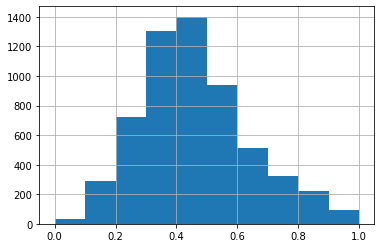

In [8]:
df_ = pd.read_csv("/home/xiaoguzai/数据/kaggle有毒评论对比/ruddit/ruddit_with_text.csv")  # create a dateframe based on a file

print(df_.shape)  # display its size

df_ = df_[['txt', 'offensiveness_score']].rename(columns={'txt': 'text',
                                                                'offensiveness_score':'y'})  # change columns

df_['y'] = (df_['y'] - df_.y.min()) / (df_.y.max() - df_.y.min())  # converting all toxicity values from 0 to 1
df_.y.hist()  # display all values on the histogram
#继续正则化另外一波数据并进行操作

In [9]:
df_.head()

,text,y
0,"> The difference in average earnings between men and women can be explained by taking into account relevant factors.\n\nSo it isn't a myth, you just feel that you can explain it.",0.431478
1,"The myth is that the ""gap"" is entirely based on the sex of the person.",0.464133
2,[deleted],0.565310
3,"The assertion is that women get paid less for the *same* jobs, and that they get paid less *because* they are women.",0.397752
4,"You said in the OP that's not what they're measuring. They're measuring aggregate. \n\nAs entertainers, women make less. Isn't that what JLaw was complaining about?",0.431478


## Create 3 versions of the data

In [10]:
n_folds = 7

frac_1 = 0.7
frac_1_factor = 0.2

#for fld in range(n_folds):
    #print(f'Fold: {fld}')
    #tmp_df = pd.concat([df[df.y>0].sample(frac=frac_1, random_state = random_seed) , 
    #                    df[df.y==0].sample(n=int(len(df[df.y>0])*frac_1*frac_1_factor) , 
    #                                        random_state = random_seed)], axis=0).sample(frac=1, random_state = random_seed)
tmp_df_origin = pd.concat([df[df.y>0.15].sample(frac=frac_1, random_state = random_seed) , 
                    df[df.y==0.142857].sample(frac=0.5, random_state = random_seed),
                    df[df.y==0].sample(n=int(len(df[df.y>0])*frac_1*frac_1_factor) , 
                                      random_state = random_seed)], axis=0).sample(frac=1, random_state = random_seed)
#随机抽取y>0抽取0.7，y=0抽取y>0的数量*0.7*0.2
tmp_df_origin.to_csv(f'/home/xiaoguzai/数据/抽取出几折数据/df_fld.csv', index=False)
print(tmp_df_origin.shape)
print(tmp_df_origin['y'].value_counts())

(13143, 2)
0.222222    4101
0.444444    2821
0.333333    2294
0.000000    2271
0.777778     689
0.555556     551
0.888889     231
0.666667     163
1.000000      22
Name: y, dtype: int64


In [11]:
df.sample(5)

,text,y
75292,"Yeah, none of the content you added meets any of the criteria in the VGSCOPE section you pointed toward. Wait a few weeks and maybe something other than brief gameplay videos and quick interviews will offer up the kind of information appropriate for the article. Placing the trivia/plot summary i...",0.000000
74046,"""\n\nwow you are dumb. and that is NOT an attack but a statement, since anyone who belives that concensus would change reality IS dumb. Just because you stack the odds in your favor on the articles in question does not mean that britches was ALF's. Since Britch's belonged to the lab, and ALF """"t...",0.444444
128476,The Australian public were vocal in their criticism of the death penalty. But did the Australian media cover the affair in a manner that was representative of public opinion or were they influencing sentiments instead? \nStart,0.000000
128296,Hey \n\nWhat is wrong with my edits? It is in Hindi language. 14.97.180.58,0.000000
41992,- The reference to this activity by user 92.11.47.205 is at Aaron,0.000000


# Create 3 versions of __clean__ data

In [12]:
import nltk
from nltk.corpus import stopwords
stop = stopwords.words('english')
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in text]

def clean(data, col):

    # Clean some punctutations
    data[col] = data[col].str.replace('\n', ' \n ')
    data[col] = data[col].str.replace(r'([a-zA-Z]+)([/!?.])([a-zA-Z]+)',r'\1 \2 \3')
    # Replace repeating characters more than 3 times to length of 3
    data[col] = data[col].str.replace(r'([*!?\'])\1\1{2,}',r'\1\1\1')    
    # Add space around repeating characters
    data[col] = data[col].str.replace(r'([*!?\']+)',r' \1 ')    
    # patterns with repeating characters 
    data[col] = data[col].str.replace(r'([a-zA-Z])\1{2,}\b',r'\1\1')
    data[col] = data[col].str.replace(r'([a-zA-Z])\1\1{2,}\B',r'\1\1\1')
    data[col] = data[col].str.replace(r'[ ]{2,}',' ').str.strip()   
    data[col] = data[col].str.replace(r'[ ]{2,}',' ').str.strip()   
    data[col] = data[col].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
    
    return data

import nltk
nltk.download('stopwords')

In [13]:
# Test clean function
test_clean_df = pd.DataFrame({"text":
                              ["heyy\n\nkkdsfj",
                               "hi   how/are/you ???",
                               "hey?????",
                               "noooo!!!!!!!!!   comeone !! ",
                              "cooooooooool     brooooooooooo  coool brooo",
                              "naaaahhhhhhh"]})
display(test_clean_df)
clean(test_clean_df,'text')

,text
0,heyy\n\nkkdsfj
1,hi how/are/you ???
2,hey?????
3,noooo!!!!!!!!! comeone !!
4,cooooooooool brooooooooooo coool brooo
5,naaaahhhhhhh


,text
0,heyy kkdsfj
1,hi / are/you ???
2,hey ???
3,noo !!! comeone !!
4,coool broo coool broo
5,naaahh


In [14]:
df = clean(df,'text')

## 绘画出训练集、验证集和测试集的数据长度分布

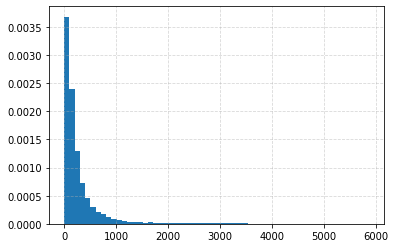

In [15]:
textlen = []
for index in range(len(df['text'])):
    textlen.append(len(df['text'][index]))
    
for index in range(len(df_['text'])):
    textlen.append(len(df_['text'][index]))
import matplotlib.pyplot as plt
a = 100
bins = int((max(textlen)-min(textlen))/a)
plt.hist(textlen,bins,density=1,stacked=True)
plt.grid(True,linestyle='--',alpha=0.5)
plt.show()

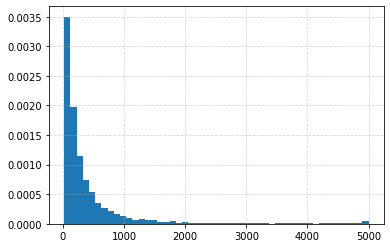

In [16]:
test_df_data = pd.read_csv("/home/xiaoguzai/数据/kaggle有毒评论对比/Jigsaw Rate Severity of Toxic Comments/comments_to_score.csv")
textlen = []
for index in range(len(test_df_data)):
    textlen.append(len(test_df_data['text'][index]))
import matplotlib.pyplot as plt
a = 100
bins = int((max(textlen)-min(textlen))/a)
plt.hist(textlen,bins,density=1,stacked=True)
plt.grid(True,linestyle='--',alpha=0.5)
plt.show()

In [17]:
df[df.y==0]

,text,y
0,"Explanation Why edits made username Hardcore Metallica Fan reverted ? They ' vandalisms, closure GAs I voted New York Dolls FAC. And please ' remove template talk page since I ' retired now.89.205.38.27",0.0
1,"D ' aww ! He matches background colour I ' seemingly stuck with. Thanks. (talk) 21:51, January 11, 2016 (UTC)",0.0
2,"Hey man, I ' really trying edit war. It ' guy constantly removing relevant information talking edits instead talk page. He seems care formatting actual info.",0.0
3,""" More I ' make real suggestions improvement - I wondered section statistics later on, subsection """"types accidents"""" -I think references may need tidying exact format ie date format etc. I later on, no-one else first - preferences formatting style references want please let know. There appears ...",0.0
4,"You, sir, hero. Any chance remember page ' ?",0.0
...,...,...
159566,""":::::And second time asking, view completely contradicts coverage reliable sources, anyone care feel ? You ' even give consistent argument - opening supposed mention significant aspects, """"most significant"""" ones ? """,0.0
159567,You ashamed That horrible thing put talk page. 128.61.19.93,0.0
159568,"Spitzer Umm, theres actual article prostitution ring. - Crunch Captain.",0.0
159569,And looks like actually put speedy first version deleted I look it.,0.0


In [18]:
n_folds = 7

frac_1 = 0.7
frac_1_factor = 0.2

#for fld in range(n_folds):
    
tmp_df_clean = pd.concat([df[df.y>0.15].sample(frac=frac_1, random_state = random_seed) , 
                    df[df.y==0.142857].sample(frac=0.5, random_state = random_seed),
                    df[df.y==0].sample(n=int(len(df[df.y>0])*frac_1*frac_1_factor) , 
                                      random_state = random_seed)], axis=0).sample(frac=1, random_state = random_seed)
                    #df[df.y==0].sample(n=int(len(df[df.y>0])),
                    #                     random_state = 10*(fld+1))],axis=0).sample(frac=1, random_state = 10*(fld+1))


tmp_df_clean.to_csv(f'/home/xiaoguzai/数据/抽取出几折数据/df_clean_fld.csv', index=False)
print(tmp_df_clean.shape)
print(tmp_df_clean['y'].value_counts())

(13143, 2)
0.222222    4101
0.444444    2821
0.333333    2294
0.000000    2271
0.777778     689
0.555556     551
0.888889     231
0.666667     163
1.000000      22
Name: y, dtype: int64


del df,tmp_df
gc.collect()

## Using bert model to train data

In [19]:
import pandas as pd
import itertools
import json
import math
from pythonicforbert import get_model_function,FullTokenizer
with open('/home/xiaoguzai/数据/kaggle有毒评论对比/roberta-base/config.json','r',encoding='utf8')as fp:
    json_data = json.load(fp)

In [20]:
import torch.nn as nn
class ClassificationModel(nn.Module):
    def __init__(self,model,config,n_labels):
        super(ClassificationModel,self).__init__()
        self.model = model
        self.fc = nn.Linear(config.embedding_size,n_labels)
        
    def forward(self,input_ids):
        mask_ids = torch.not_equal(input_ids,1)
        #英文roberta padding=1
        output = self.model(input_ids)
        #print('output1 = ')
        #print(output[0:5,0:5])
        output = output[:,0]
        #print('output2 = ')
        #print(output[0:5,0:5])
        output = self.fc(output)
        #print('final_output = ')
        #print(output)
        return output

def train_compute_multilabel_loss(x,model,label):
    logit = model(x)
    loss_fn = torch.nn.MSELoss(reduce=True, size_average=True)
    mseloss = loss_fn(logit,label)
    return mseloss

def test_compute_multilabel_loss(x1,x2,model,label):
    with torch.no_grad():
        logit1 = model(x1)
    loss_fn = torch.nn.MSELoss(reduce=True, size_average=True)
    mseloss = loss_fn(logit,label)
    return mseloss

损失函数备选：平方差、绝对值差函数

In [21]:
current_df = pd.read_csv("/home/xiaoguzai/数据/抽取出几折数据/df_clean_fld0.csv")
print(current_df.sample(5))

                                                                                                                                                                                                                               text  \
758                                                                                                                       blow Its right freedom speech edit wikipedia. So fuck I ' rape anally vaginally. Good day. 78.148.200.177   
820                                         Do threaten nazi !! You ' stop me. I hope going online day, I ! And I monitoring page. You ' block me, I admin. So fun. Latuff gay, plain simple, mom left dad jew. I reliable sources.   
2285  " You ' fucking moron Please kill yourself. You cancerous moron devoid intelligence business editing Wikipedia privileges thereof. I demand restore userpages full, removing copyright infringement contained within. Mate1 "   
372                                                                         

In [22]:
total_text,total_label = [],[]
for current_split in range(n_folds):
    current_df = pd.read_csv("/home/xiaoguzai/数据/抽取出几折数据/df_clean_fld"+str(current_split)+".csv")
    total_text.append(current_df['text'].values.tolist())
    total_label.append(current_df['y'].values.tolist())

## 多折叠模型训练代码

In [23]:
#tokenizer = FullTokenizer(vocab_file=vocab_file)
from torch.utils.data import Dataset,DataLoader
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("/home/xiaoguzai/模型/roberta-english-base")
class ClassificationDataset(Dataset):
    def __init__(self,text,maxlen,labels):
        self.text = text
        self.maxlen = maxlen
        self.labels = labels
        token_id = []
        for index in tqdm(range(len(self.text))):
            current_text = text[index]
            current_id = tokenizer(current_text)['input_ids']
            #roberta begin:0,end:2
            #current_id = tokenizer.convert_tokens_to_ids(current_token)
            current_id = self.sequence_padding(current_id)
            token_id.append(current_id)
        self.token_id = token_id
        self.tensors = [torch.tensor(self.token_id),\
                       torch.tensor(self.labels)]
        
    def __len__(self):
        return len(self.token_id)

    def __getitem__(self,index):
        return tuple(tensor[index] for tensor in self.tensors)
    
    def sequence_padding(self,inputs,padding = 1):
        length = self.maxlen
        if len(inputs) > length:
            inputs = inputs[:length-1]+[inputs[-1]]
        #保留[sep]标志部分,
        outputs = []
        pad_width = (0,length-len(inputs))
        x = np.pad(inputs,pad_width,'constant',constant_values=padding)
        return x

In [24]:
#易错点：testdataset的内容需要跟classificationdataset的内容保持一致
class TestDataset(Dataset):
    def __init__(self,text,maxlen):
        self.text = text
        self.maxlen = maxlen
        token_id = []
        for index in tqdm(range(len(self.text))):
            current_text = text[index]
            current_id = tokenizer(current_text)['input_ids']
            #roberta begin:0,end:2
            #current_id = tokenizer.convert_tokens_to_ids(current_token)
            current_id = self.sequence_padding(current_id)
            token_id.append(current_id)
        self.token_id = token_id
        
    def __len__(self):
        return len(self.token_id)

    def __getitem__(self,index):
        #return [tuple(tensor[index] for tensor in self.tensors)]
        return self.token_id[index]
    
    def sequence_padding(self,inputs,padding=1):
        #英文roberta padding=1
        length = self.maxlen
        if len(inputs) > length:
            inputs = inputs[:length-1]+[inputs[-1]]
        #保留[sep]标志部分
        outputs = []
        pad_width = (0,length-len(inputs))
        x = np.pad(inputs,pad_width,'constant',constant_values=padding)
        return x

In [25]:
valid_data_df = pd.read_csv("/home/xiaoguzai/数据/Kaggle Jigsaw Rate Severity of Toxic Comments/validation_true.csv")

In [26]:
type(df_['text'])

pandas.core.series.Series

In [27]:
from tqdm import tqdm
import torch.nn.functional as F
from torch.optim.lr_scheduler import LambdaLR
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
bestpoint = []
n_folds = 6
#先单模单折
#ruddit_with_text.csv
r"""
比较l1loss和mseloss的不同结果
比较9e-6和2e-5的学习率
"""

less_toxic,more_toxic = valid_data_df['less_toxic'],valid_data_df['more_toxic']

for current_slit in range(n_folds):
    bestpoint.append(0.0)

for current_split in range(1):
    train_text,train_label = [],[]
    #单模单折所有数据作为训练集
    #下面部分数据可能加入了
    train_text = train_text+df_['text'].values.tolist()
    train_label = train_label+df_['y'].values.tolist()
    
    #加入ruddit_data进行训练
    print(len(train_text))
    
    #def __init__(self,text,maxlen,labels)
    
    #加载官方bert模型
    Roberta,robertaconfig,get_data = get_model_function('roberta-base')
    config = robertaconfig(**json_data)
    config.with_mlm = False
    roberta = Roberta(config)
    roberta = get_data(roberta,'/home/xiaoguzai/模型/unbiased-toxic-roberta/pytorch_model.bin')
    model = ClassificationModel(roberta,config,1)
    
    #model = torch.load('best_score=0.5861129136924075split=0.pth')
    train_dataset = ClassificationDataset(text=train_text,maxlen=500,labels=train_label)
    train_loader = DataLoader(train_dataset,batch_size=4,shuffle=True)
    optimizer = torch.optim.AdamW(model.parameters(),lr=9e-6)
    def lr_lambda(epoch):
        if epoch > 5:
            return 1
        else:
            return 2/(epoch+1)
    scheduler = LambdaLR(optimizer, lr_lambda)
    print("初始化的学习率：", optimizer.defaults['lr'])
    
    for epoch in range(8):
        print('epoch {}'.format(epoch))
        
        train_loss = 0
        train_acc = 0
        #model = torch.load('/home/xiaoguzai/程序/kaggle有毒评论对比比赛/best_score=20261.0split=0.pth')
        
        model.train()

        model = model.to(device)
        model = nn.DataParallel(model)
        loss_fn = torch.nn.L1Loss(reduce=True,size_average=True)
        

        for batch_token_ids,batch_labels in tqdm(train_loader):
            torch.set_printoptions(edgeitems=768)# 设置输出矩阵维度为768
            batch_token_ids = batch_token_ids.to(device)
            batch_labels = batch_labels.to(device)
            optimizer.zero_grad()
            loss = train_compute_multilabel_loss(batch_token_ids,model,batch_labels)
            train_loss = train_loss+loss
            loss.backward()
            optimizer.step()
        scheduler.step()
        print("第%d个epoch的学习率：%f" % (epoch, optimizer.param_groups[0]['lr']))
        #注意必须从epoch=1开始，否则第0个没有学习率
        print('Train Loss: {:.6f}'.format(train_loss))
        
        less_toxic_point,more_toxic_point = [],[]
        right = []
        test_dataset = TestDataset(less_toxic,maxlen=500)
        test_loader = DataLoader(test_dataset,batch_size=16)
        model.eval()
        model = model.to(device)
        for batch_token in tqdm(test_loader):
            batch_token = batch_token.to(device)
            with torch.no_grad():
                result_point = model(batch_token)
                less_toxic_point = less_toxic_point+result_point.cpu().numpy().tolist()
        test_dataset = TestDataset(more_toxic,maxlen=500)
        test_loader = DataLoader(test_dataset,batch_size=16)
        for batch_token in tqdm(test_loader):
            batch_token = batch_token.to(device)
            with torch.no_grad():
                result_point = model(batch_token)
                more_toxic_point = more_toxic_point+result_point.cpu().numpy().tolist()
        right_point = sum([less_toxic_point[index] < more_toxic_point[index] for index in range(len(less_toxic_point))])
        right_point = right_point/len(less_toxic_point)
        print('right_point = ')
        print(right_point)
        if right_point >= bestpoint[current_split]:
            bestpoint[current_split] = right_point
            torch.save(model,'./直接計算分數best_score='+str(bestpoint[current_split])+'split='+str(current_split)+'.pth')

cuda:0
5838
Done loading 197 ROBERTA weights from: /home/xiaoguzai/模型/unbiased-toxic-roberta/pytorch_model.bin. Count of weights not found in the checkpoint was: [0]. Count of weights with mismatched shape: [0]
Unused weights from checkpoint: 
	classifier.dense.weight
	classifier.dense.bias
	classifier.out_proj.bias
	classifier.out_proj.weight
	roberta.embeddings.position_ids


100%|█████████████████████████████████████| 5838/5838 [00:00<00:00, 7523.56it/s]


初始化的学习率： 9e-06
epoch 0


100%|███████████████████████████████████████| 1460/1460 [02:18<00:00, 10.54it/s]


第0个epoch的学习率：0.000009
Train Loss: 53.717358


100%|█████████████████████████████████████████| 301/301 [00:28<00:00, 10.38it/s]


right_point = 
0.7784019975031211
epoch 1


100%|███████████████████████████████████████| 1460/1460 [02:19<00:00, 10.48it/s]


第1个epoch的学习率：0.000006
Train Loss: 48.654572


100%|█████████████████████████████████████████| 301/301 [00:29<00:00, 10.37it/s]


right_point = 
0.799625468164794
epoch 2


100%|███████████████████████████████████████| 1460/1460 [02:15<00:00, 10.76it/s]


第2个epoch的学习率：0.000005
Train Loss: 47.019085


100%|█████████████████████████████████████████| 301/301 [00:26<00:00, 11.17it/s]


right_point = 
0.8135663753641281
epoch 3


100%|███████████████████████████████████████| 1460/1460 [02:10<00:00, 11.22it/s]


第3个epoch的学习率：0.000004
Train Loss: 46.505455


100%|█████████████████████████████████████████| 301/301 [00:27<00:00, 10.99it/s]


right_point = 
0.8322929671244278
epoch 4


100%|███████████████████████████████████████| 1460/1460 [02:10<00:00, 11.17it/s]


第4个epoch的学习率：0.000003
Train Loss: 46.158840


100%|█████████████████████████████████████████| 301/301 [00:27<00:00, 11.01it/s]


right_point = 
0.8293799417394923
epoch 5


 10%|████▏                                   | 153/1460 [00:13<01:59, 10.94it/s]


KeyboardInterrupt: 

In [ ]:
result_point

In [ ]:
len(less_toxic_point)*2*0.6

In [ ]:
right_point

roberta.state_dict().keys()

In [ ]:
## 使用验证集计算出多折模型的权重内容
model = torch.load('./best_score='+str(bestpoint[current_split])+'split='+str(current_split)+'.pth')

## Load Validation and Test data  


In [ ]:
# Test data
df_test = pd.read_csv("/home/xiaoguzai/数据/kaggle有毒评论对比/Jigsaw Rate Severity of Toxic Comments/comments_to_score.csv")
test_dataset = TestDataset(df_test['text'],maxlen=500)
test_loader = DataLoader(test_dataset,batch_size=16)
model = model.to(device)
model.eval()
result = []
for batch_token in tqdm(test_loader):
    batch_token = batch_token.to(device)
    with torch.no_grad():
        current_point = model(batch_token)
        result = result+current_point.cpu().numpy().tolist()

In [ ]:
df_submission = pd.read_csv("/home/xiaoguzai/数据/kaggle有毒评论对比/Jigsaw Rate Severity of Toxic Comments/sample_submission.csv")
df_submission['score'] = result
df_submission[['comment_id', 'score']].to_csv("submission.csv", index=False)